## what this script does
It takes a shortstack result dataframe and generate a barplot with the numbers of A,C,G,U found in the sequences of the MajorRNA column

## Steps

1. Reads a shortstack result dataframe
2. extracts the majorRNA column and puts it into a list
3. extracts the first nucleotide from the first column
4. builds a dataframe that stores this information.
5. makes a barplot with one bar per letter (n=4, x-axis) and the number of times the letter was found.

**Dataframe with the information**: from a list of sequences, count the numbers of A,C,G,U in the five and three prime. Returns a small dataframe that looks like:

| pos         | A  | U | C | G |
|-------------|----|---|---|---|
| five prime  | 10 | 2 | 5 | 6 |





## Step 0 import modules and create helper functions

In [65]:
import pandas as pd
from collections import Counter
import seaborn as sns

def count_five_prime_nucleotides(list_of_srna_sequences):
    "takes a list of small RNA sequences and returns the counts of each nucleotide in a dictionary"
    cnt = Counter(list_of_srna_sequences)
    d = {}
    for key,value in cnt.items():
        d[key]=value
    return d


def create_barplot_from_five_prime_nucleotide_counts(shortstack_result_dataframe):
    "reads a ShortStack result dataframe and counts the number of A/C/G/U of the Major RNA 5' nucleotides"
    df = pd.read_csv(shortstack_result_dataframe,sep="\t")
    majorRNAs = df['MajorRNA'].tolist()
    five_prime_nucleotides = [seq[0] for seq in majorRNAs]
    # counts occurences of nucleotides
    cnt_dict = count_five_prime_nucleotides(five_prime_nucleotides)
    # converts the dictoinary into a dataframe
    counts = pd.DataFrame.from_dict(cnt_dict,orient="index")
    counts = counts.reset_index()
    counts.columns=["nucleotide","five_prime_counts"]
    fig = sns.barplot(data=counts,x="nucleotide",y="five_prime_counts")
    return fig

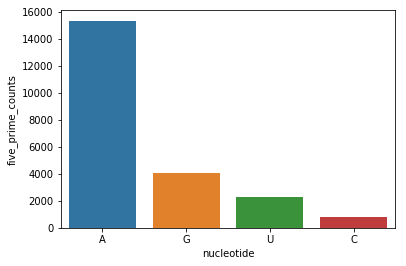

In [73]:
create_barplot_from_five_prime_nucleotide_counts("../test/Results.txt")

## Step 3

In [68]:
five_prime_nucleotides = [seq[0] for seq in majorRNAs]
three_prime_nucleotides = [seq[-1] for seq in majorRNAs]

## Step 4 & 5

# Step 5

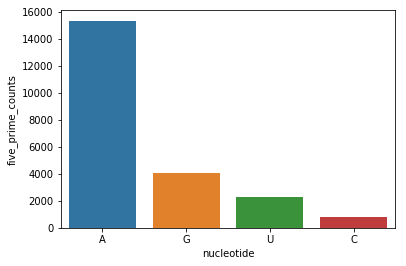

In [69]:
sns.barplot(data=counts,x="nucleotide",y="five_prime_counts")

# Next exercise: making a function out of these steps
It should:
1. Take a Shortstack result file as input
2. Returns a figure object that can be printed

In [70]:
def create_barplot_from_five_prime_nucleotide_counts(shortstack_result_dataframe):
    "reads a ShortStack result dataframe and counts the number of A/C/G/U of the Major RNA 5' nucleotides"
    df = pd.read_csv(shortstack_result_dataframe,sep="\t")
    majorRNAs = df['MajorRNA'].tolist()
    five_prime_nucleotides = [seq[0] for seq in majorRNAs]
    # counts occurences of nucleotides
    cnt_dict = count_five_prime_nucleotides(five_prime_nucleotides)
    # converts the dictoinary into a dataframe
    counts = pd.DataFrame.from_dict(cnt_dict,orient="index")
    counts = counts.reset_index()
    counts.columns=["nucleotide","five_prime_counts"]
    fig = sns.barplot(data=counts,x="nucleotide",y="five_prime_counts")
    return fig


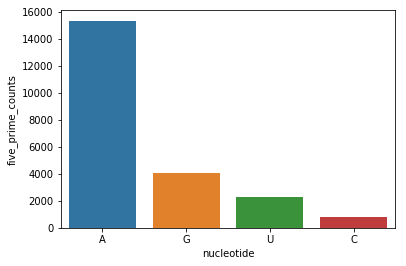

In [71]:
create_barplot_from_five_prime_nucleotide_counts("../test/Results.txt")